## CASTRO samples for 4 dimensional problem or subproblem 1 of 9 dimensional problem

This Notebook runs the CASTRO algorithm for generating feasible samples for the 4 dimensional problem or subproblem 1 of the 9 dimensional problem.

As components we have the polymer PA56, phytic acid, an amino-based component and a metallic component.

It contains the following steps:
1. Initialization
2. CASTRO samples
3. Sample selection by checking distance from experimental data and illustrations
4. Distribution plots
5. Write results to csv files
6. Show results


written by Christina Schenk

last updated on 05/07/2024

tested on Christina's M1 Mac

#### Import python packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pathlib import Path  
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append('..')
from src.conditionedSampling import *
from src.plot import *
from src.utils import *

### **1. Initialization**

##### Specify the design space: lower and upper bounds for x and y, number of points at which we want to predict

In [2]:
#Lower and upper bounds for x and y:
#polymer:
PA56_lb = 0.8
PA56_ub = 1.0
#phytic acid:
PhA_lb = 0.0
PhA_ub = 0.05
#amino-based acids:
am_lb = 0.0
am_ub = 0.1
#metallic-based acids:
met_lb = 0.0
met_ub = 0.14

x1_lb = PA56_lb
x1_ub = PA56_ub

x2_lb = PhA_lb
x2_ub = PhA_ub

x3_lb = am_lb
x3_ub = am_ub

x4_lb = met_lb
x4_ub = met_ub

#dimension of design space:
dim = 4
bounds = [[x1_lb,x1_ub],[x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]

#number of samples
n_samp = 100

### **2. CASTRO samples** 
#### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

#### Calculate all permutations of bounds

In [3]:
all_perms = []
all_perms += permutations(range(dim))

#### Define algorithm parameters

In [57]:
#dimension of design space:
#dim = 4
tot_samp = 144
prev_bounds = [[x1_lb,x1_ub], [x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
n_samp = tot_samp//len(all_perms)
tol_norm = 5e-1
num_select = 4
all_select = True
max_rej = n_samp//2

In [58]:
all_val_samples, all_val_samples_mdu = sample_with_bound_permutations(prev_bounds=prev_bounds, n_samp=n_samp, tol_norm=tol_norm, all_select=all_select, num_select=num_select, max_rej=max_rej, dim=dim)

NUM_METH 0
----- 0 -----
[[0.8, 1.0], [0.0, 0.05], [0.0, 0.1], [0.0, 0.14]]
--------------
rejected 1  samples
sample1 [[0.83064157]
 [0.88156528]
 [0.93344637]
 [0.85476442]
 [0.92151136]]
sample2 [[0.00841864]
 [0.04399031]
 [0.00762839]
 [0.04038895]
 [0.01977095]]
sample3 [[0.02810977]
 [0.05173263]
 [0.00924932]
 [0.08063699]
 [0.04677861]]
sample4 [[0.13283003]
 [0.02271179]
 [0.04967593]
 [0.02420964]
 [0.01193908]]
Sum all [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
The conditioned LHS algorithm took  0.0024378299713134766 CPUs
(array([[0.83064157],
       [0.88156528],
       [0.93344637],
       [0.85476442],
       [0.92151136]]), array([[0.00841864],
       [0.04399031],
       [0.00762839],
       [0.04038895],
       [0.01977095]]), array([[0.02810977],
       [0.05173263],
       [0.00924932],
       [0.08063699],
       [0.04677861]]), array([[0.13283003],
       [0.02271179],
       [0.04967593],
       [0.02420964],
       [0.01193908]]))
----- 1 -----
[[0.8, 1.0], [0.0, 0.05], [0

### **3. Sample selection by checking distance from experimental data and illustration**

#### Import data and format

In [59]:
filename = './data/Bank_Data-2808_mod_corrected.csv'#Bank_Data_mod_clean.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
#df = df.replace(',','.', regex=True)
df = df.div(100.)
print(df, len(df))
data_array = np.zeros((len(df),dim))
data_array = np.column_stack((df['PA-56'].to_numpy(), df['PhA'], df['am-based'], df['met-based']))


    PA-56    HNT    PhA   CS   BN   THAM   CaBO   ZnBO    Mel  met-based   
0    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000  \
1    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
2    0.95  0.000  0.017  0.0  0.0  0.033  0.000  0.000  0.000      0.000   
3    0.95  0.000  0.017  0.0  0.0  0.017  0.000  0.017  0.000      0.017   
4    0.95  0.000  0.017  0.0  0.0  0.017  0.017  0.000  0.000      0.017   
..    ...    ...    ...  ...  ...    ...    ...    ...    ...        ...   
70   0.90  0.050  0.000  0.0  0.0  0.000  0.000  0.000  0.050      0.050   
71   0.97  0.020  0.000  0.0  0.0  0.000  0.000  0.000  0.010      0.020   
72   0.95  0.033  0.000  0.0  0.0  0.000  0.000  0.000  0.017      0.033   
73   0.93  0.047  0.000  0.0  0.0  0.000  0.000  0.000  0.023      0.047   
74   0.90  0.067  0.000  0.0  0.0  0.000  0.000  0.000  0.033      0.067   

    am-based  
0      0.000  
1      0.000  
2      0.033  
3      0.017  
4      0.017

#### Standardize data

In [60]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(all_val_samples)
all_val_samples_scaled = scaler2.transform(all_val_samples)
scaler3 = StandardScaler().fit(all_val_samples_mdu)
all_val_samples_mdu_scaled = scaler3.transform(all_val_samples_mdu)

In [61]:
print(len(all_val_samples_mdu))
print(len(all_val_samples))

178
92


#### Transform with PCA and plot in two dimensions for both LHS(MDU) samples and Data
#### Check variance ratios

In [62]:
pca = PCA(n_components=2)
Xt1 = pca.fit_transform(data_scaled)
print("variance ratio data", pca.explained_variance_ratio_)
print("variance ratio norm data", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt2 = pca.fit_transform(all_val_samples_scaled)
print("variance ratio lhs", pca.explained_variance_ratio_)
print("variance ratio norm lhs", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt3 = pca.fit_transform(all_val_samples_mdu_scaled)
print("variance ratio lhsmdu", pca.explained_variance_ratio_)
print("variance ratio norm lhsmdu", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)

variance ratio data [0.43079055 0.30611911]
variance ratio norm data 0.5284783866299463
[[-0.72137182  0.38600935  0.31579681  0.48051207]
 [-0.05604267 -0.41093141 -0.62786664  0.65861831]]
variance ratio lhs [0.44878717 0.334346  ]
variance ratio norm lhs 0.5596402114513803
[[ 0.74569773 -0.22708332 -0.31685981 -0.54034057]
 [ 0.01064357 -0.51203799 -0.62057859  0.59378955]]
variance ratio lhsmdu [0.47259455 0.32322016]
variance ratio norm lhsmdu 0.572552951960936
[[ 0.72131989 -0.36776194 -0.35075503 -0.47055252]
 [-0.06902857 -0.39967716 -0.62175122  0.67001391]]


#### Scatterplot for reduced 2 dimensional PCA points

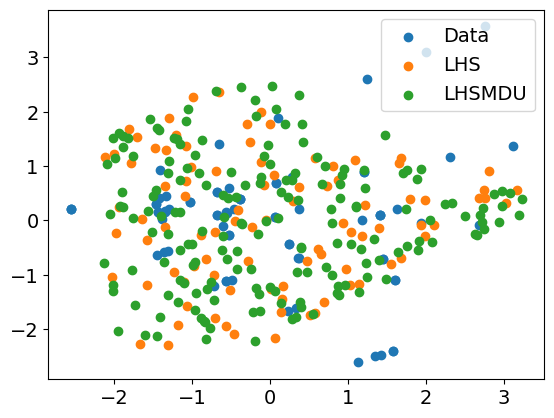

In [102]:
plot_dimred_2dims_both_methods(Xt1, Xt2, Xt3)

#### Select subset of samples that varies the most in terms of distance from the already collected data

In [64]:
tol = 1e-5
tol2 = 1e-5
des_n_samp = 90

tol_samples, tol_samples_LHSMDU, tol_samples_unscaled, tol_samples_LHSMDU_unscaled = select_samples_diff_from_data(exp_data=data_array, samples_LHS=all_val_samples, samples_LHSMDU=all_val_samples_mdu, des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


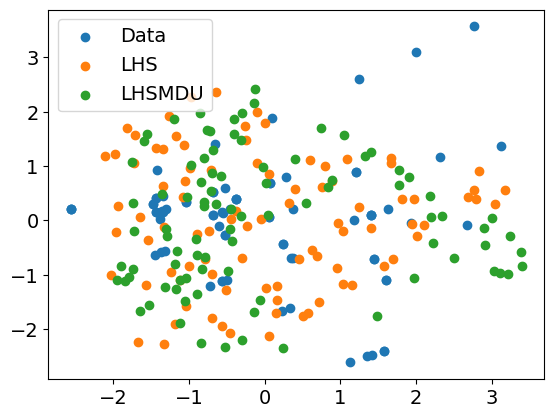

In [65]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
lhs_samples_pca = pca.fit_transform(tol_samples)
lhsmdu_samples_pca = pca.fit_transform(tol_samples_LHSMDU)

plot_dimred_2dims_both_methods(data_pca, lhs_samples_pca, lhsmdu_samples_pca)

#### Test whether all selected samples are feasible

In [66]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


 ### **4. Distribution plots**

#### Distribution plots of scaled data

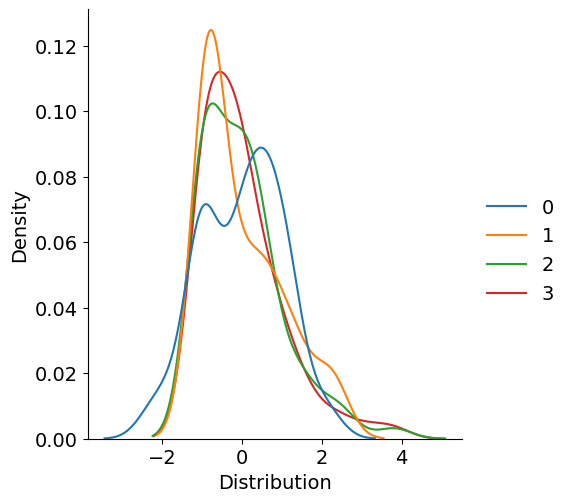

In [67]:
distplot_samples(data_scaled)

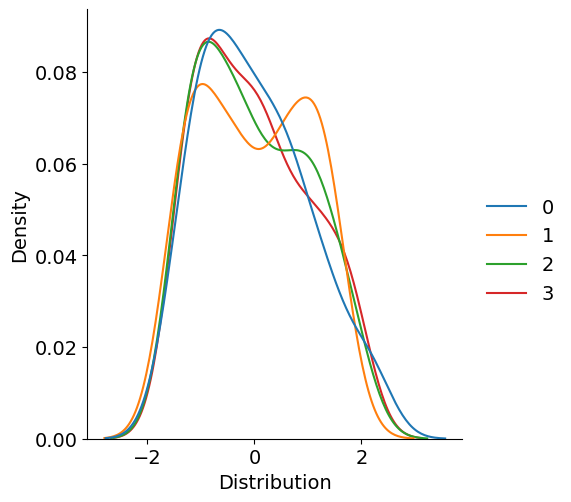

In [68]:
distplot_samples(all_val_samples_scaled)

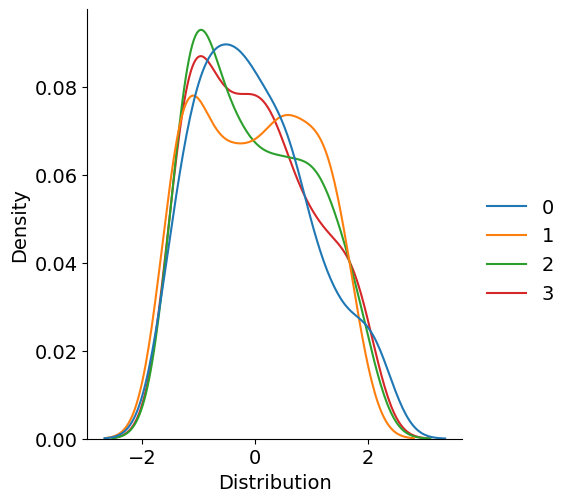

In [69]:
distplot_samples(all_val_samples_mdu_scaled)

#### Distribution subplots of scaled data

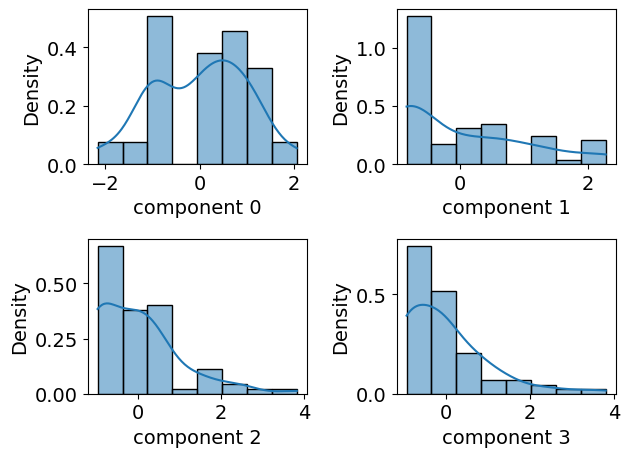

In [70]:
box_kdeplot_samples(data_scaled)

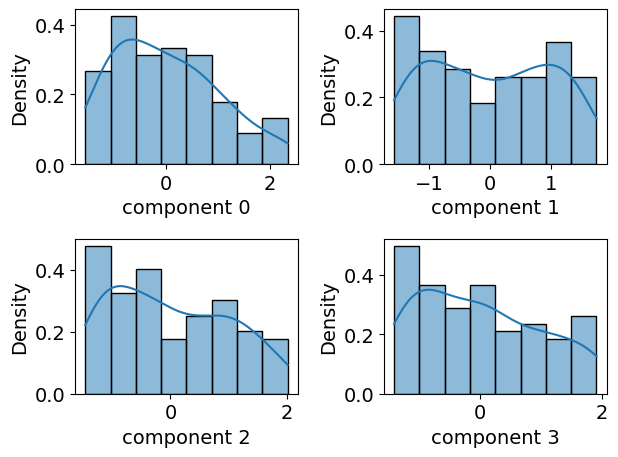

In [71]:
box_kdeplot_samples(all_val_samples_scaled)

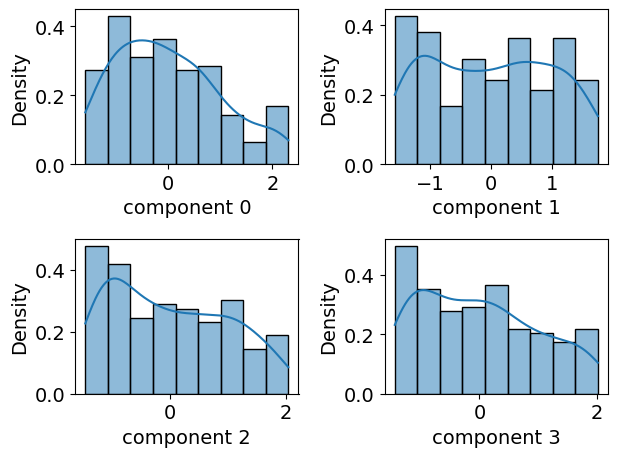

In [72]:
box_kdeplot_samples(all_val_samples_mdu_scaled)

In [73]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270285
variance lhs [1.01098901 1.01098901 1.01098901 1.01098901]
variance norm lhs 2.0219780219780223
variance lhsmdu [1.00564972 1.00564972 1.00564972 1.00564972]
variance norm lhsmdu 2.0112994350282483


#### Distribution plots of unscaled data:

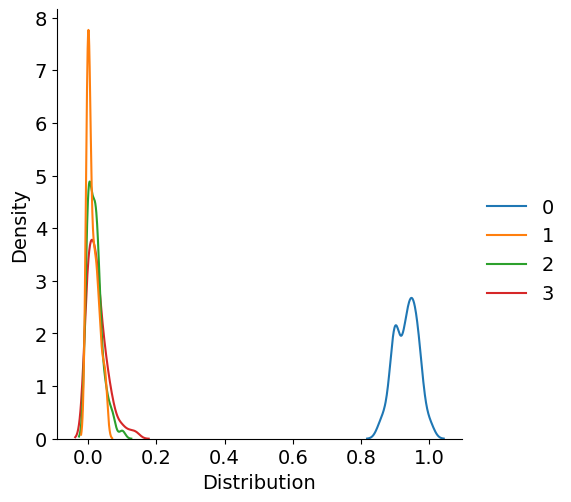

In [74]:
distplot_samples(data_array)

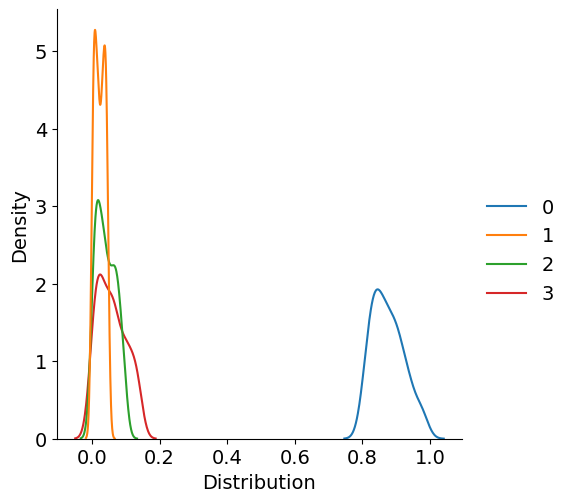

In [75]:
distplot_samples(all_val_samples)

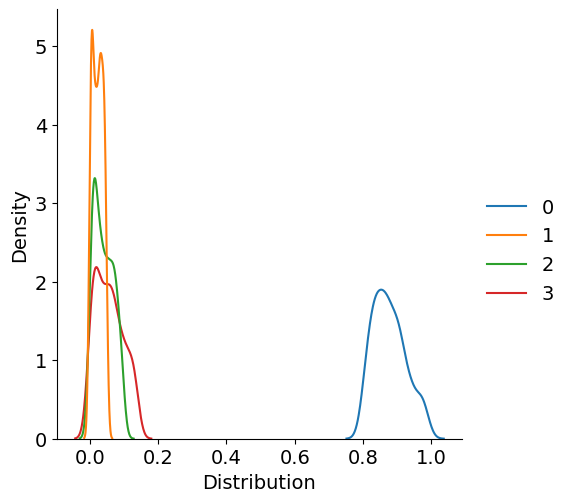

In [76]:
distplot_samples(all_val_samples_mdu)

#### Distribution subplots of unscaled data

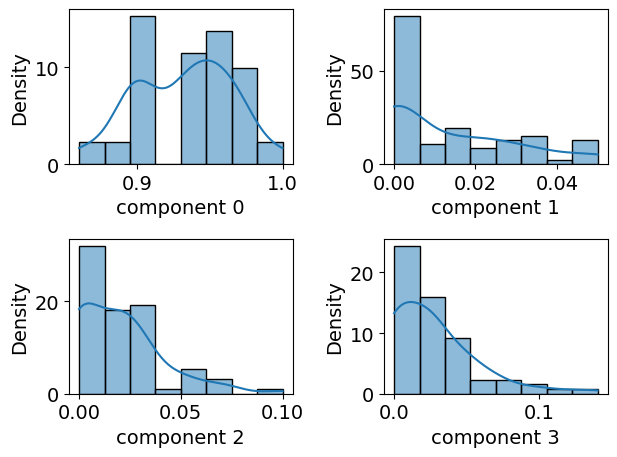

In [77]:
box_kdeplot_samples(data_array)

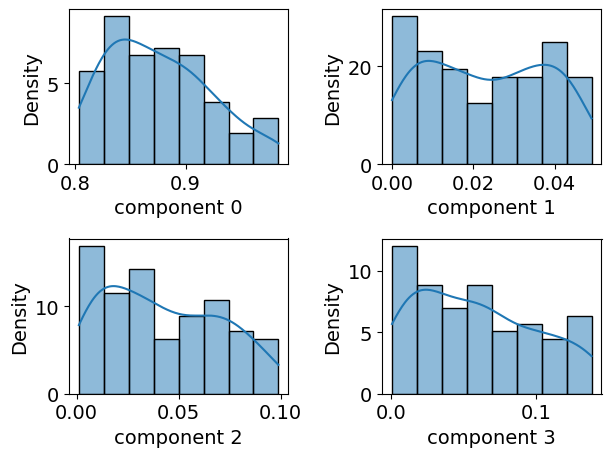

In [78]:
box_kdeplot_samples(all_val_samples)

In [79]:
for i in range(len(all_val_samples)):
    if all_val_samples[i,1]>0.05:
        print(i)

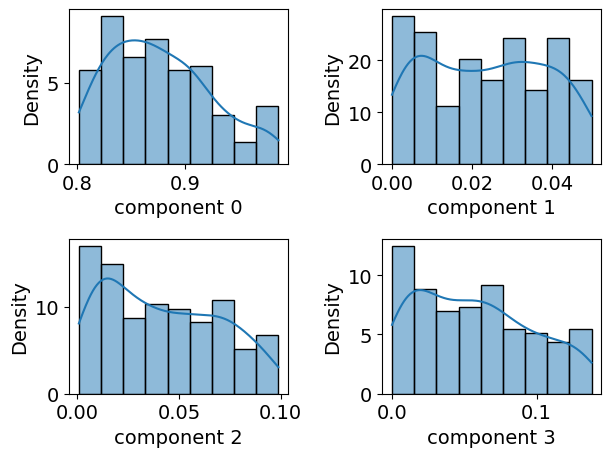

In [80]:
box_kdeplot_samples(all_val_samples_mdu)

In [81]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026141 0.0004443  0.00088963]
variance norm data 0.0015183436611557698
variance lhs [0.00217054 0.00021803 0.00080158 0.0017212 ]
variance norm lhs 0.0028920309890889083
variance lhsmdu [0.00223785 0.00022524 0.00078754 0.00158946]
variance norm lhsmdu 0.002864492174280177


#### Distribution plots of scaled reduced data

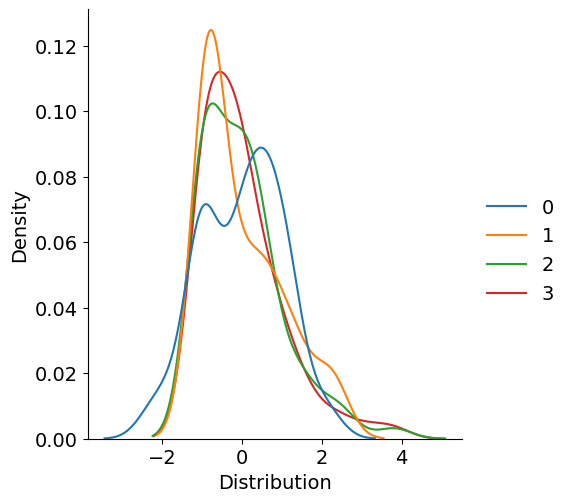

In [82]:
distplot_samples(data_scaled)

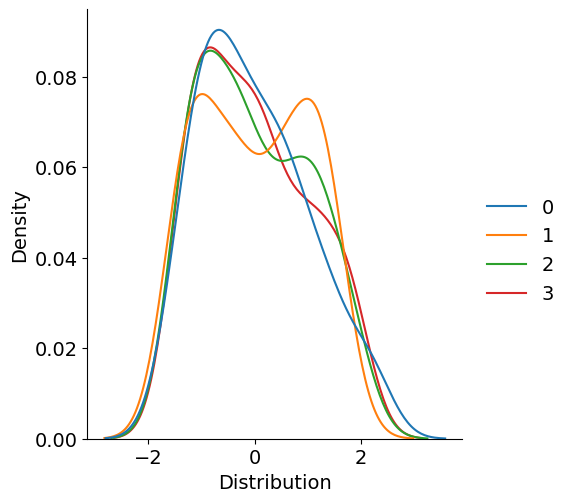

In [83]:
distplot_samples(tol_samples)

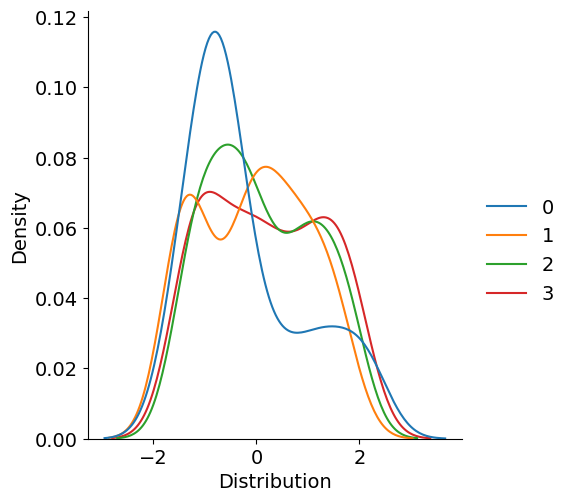

In [84]:
distplot_samples(tol_samples_LHSMDU)

#### Distribution subplots of scaled reduced data

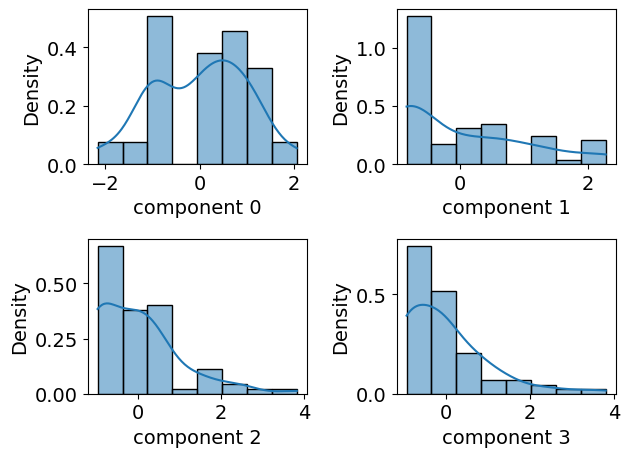

In [85]:
box_kdeplot_samples(data_scaled)

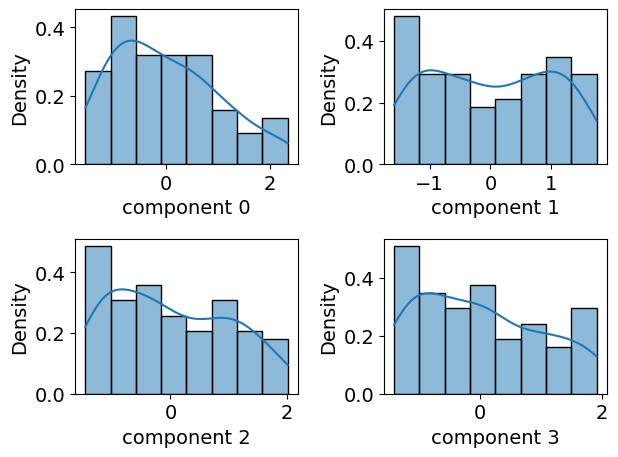

In [86]:
box_kdeplot_samples(tol_samples)


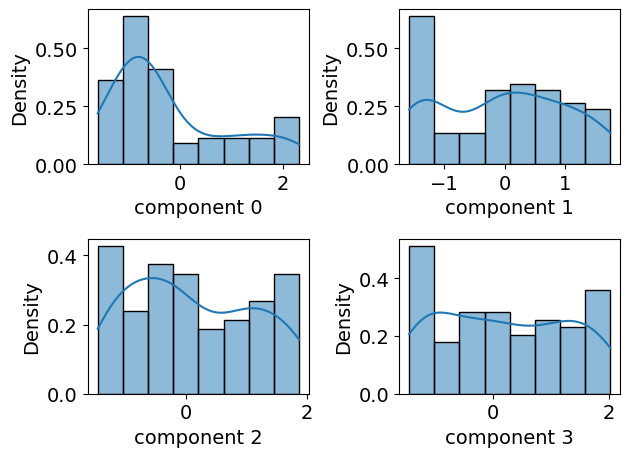

In [87]:
box_kdeplot_samples(tol_samples_LHSMDU)

#### Variances

In [88]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270285
variance lhs [1.02581617 1.0220792  1.02123009 1.02221088]
variance norm lhs 2.045671208597087
variance lhsmdu [1.23916342 1.09316113 1.05060193 1.23259077]
variance norm lhsmdu 2.31377865568765


#### Distribution plots of unscaled reduced data:

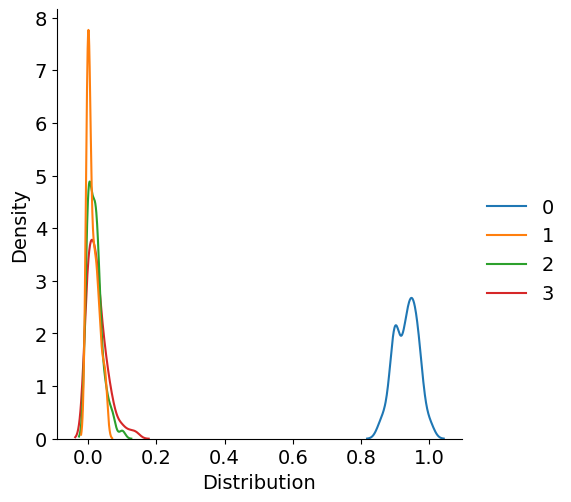

In [89]:
distplot_samples(data_array)

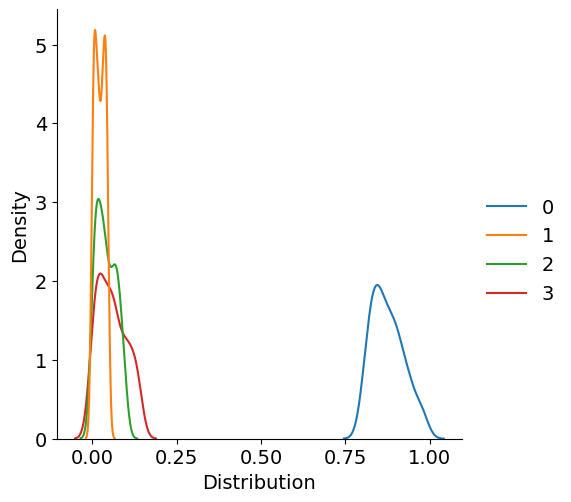

In [90]:
distplot_samples(tol_samples_unscaled)

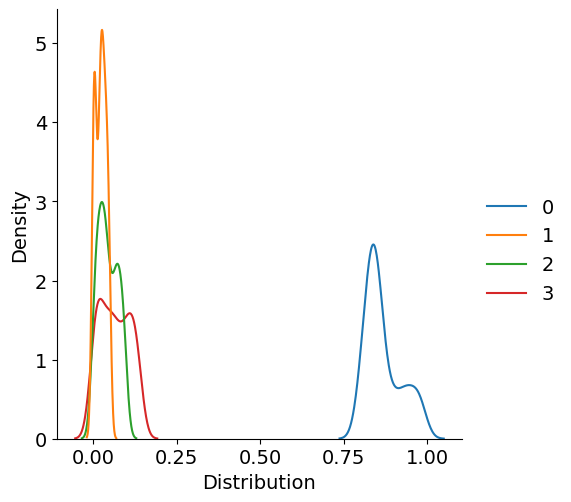

In [91]:
distplot_samples(tol_samples_LHSMDU_unscaled)

#### Distribution subplots of unscaled reduced data

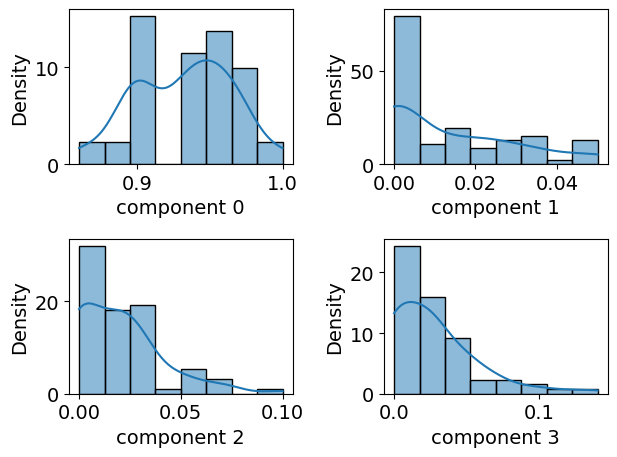

In [92]:
box_kdeplot_samples(data_array)

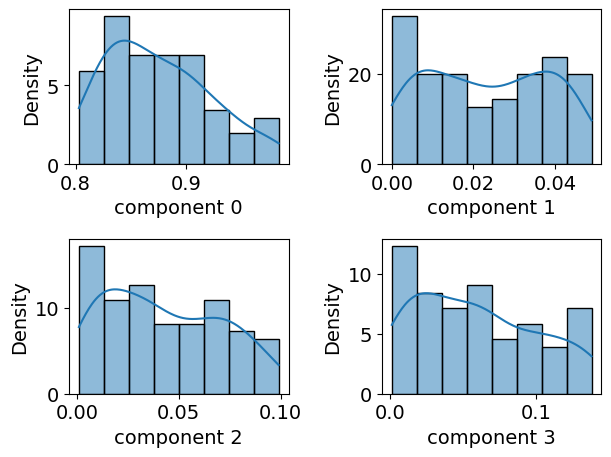

In [93]:
box_kdeplot_samples(tol_samples_unscaled)

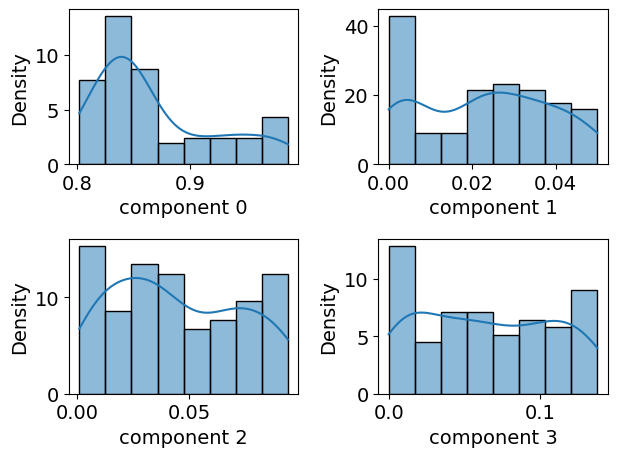

In [94]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled)

In [95]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026141 0.0004443  0.00088963]
variance norm data 0.0015183436611557698
variance lhs [0.00220249 0.00022056 0.000812   0.00174177]
variance norm lhs 0.0029313356525916046
variance lhsmdu [0.00275603 0.00024495 0.00082166 0.00194613]
variance norm lhsmdu 0.0034811226777739976


### **5. Write results to csv files**

In [96]:
tol_samples_unscaled_df = pd.DataFrame(tol_samples_unscaled)
tol_samples_LHSMDU_unscaled_df = pd.DataFrame(tol_samples_LHSMDU_unscaled)

In [97]:
filepath = Path('Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath, tol_samples_unscaled_df)

filepath2 = Path('Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath2, tol_samples_LHSMDU_unscaled_df)

In [98]:
all_val_samples_df = pd.DataFrame(all_val_samples)
all_val_samples_mdu_df = pd.DataFrame(all_val_samples_mdu)

In [99]:
filepath3 = Path('Outputs/LHS_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath2, all_val_samples_df)

filepath4 = Path('Outputs/LHSMDU_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath2, all_val_samples_mdu_df)

### **6. Show results**

In [103]:
tol_samples_unscaled_df

,0,1,2,3
0,0.923,0.017,0.036,0.024
1,0.872,0.010,0.007,0.111
2,0.864,0.040,0.019,0.077
3,0.880,0.039,0.066,0.015
4,0.971,0.011,0.006,0.012
...,...,...,...,...
85,0.804,0.033,0.085,0.078
86,0.808,0.030,0.026,0.136
87,0.936,0.041,0.014,0.010
88,0.803,0.025,0.036,0.136


In [101]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.852,0.018,0.047,0.082
1,0.852,0.034,0.090,0.024
2,0.833,0.037,0.093,0.037
3,0.808,0.037,0.056,0.099
4,0.909,0.020,0.066,0.005
...,...,...,...,...
85,0.936,0.041,0.014,0.010
86,0.808,0.030,0.026,0.136
87,0.808,0.033,0.094,0.065
88,0.803,0.025,0.036,0.136


#### Normalize such that add up to 1 and perform check

In [49]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_unscaled_df.columns)):
            tol_samples_unscaled_df.iloc[i,j] = np.around(tol_samples_unscaled_df.iloc[i,j]/sum(tol_samples_unscaled_df.iloc[i,:]),3)

In [50]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_unscaled_df.iloc[i,:]))

11 1.0000000000000002


In [51]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_LHSMDU_unscaled_df.columns)):
            tol_samples_LHSMDU_unscaled_df.iloc[i,j] = np.around(tol_samples_LHSMDU_unscaled_df.iloc[i,j]/sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]),3)

In [52]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]))

12 0.9999999999999999
18 1.0000000000000002


In [53]:
tol_samples_unscaled_df

,0,1,2,3
0,0.924,0.028,0.045,0.003
1,0.950,0.018,0.011,0.021
2,0.903,0.034,0.030,0.033
3,0.930,0.021,0.044,0.005
4,0.898,0.002,0.044,0.056
5,0.845,0.039,0.056,0.060
6,0.959,0.002,0.020,0.019
7,0.870,0.022,0.100,0.008
8,0.898,0.015,0.074,0.013
9,0.984,0.002,0.006,0.008


In [54]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.930,0.021,0.044,0.005
1,0.924,0.028,0.045,0.003
2,0.903,0.034,0.030,0.033
3,0.877,0.034,0.059,0.030
4,0.950,0.018,0.011,0.021
5,0.845,0.039,0.056,0.060
6,0.971,0.012,0.016,0.001
7,0.950,0.024,0.025,0.001
8,0.898,0.015,0.074,0.013
9,0.841,0.045,0.033,0.081


#### Test whether all selected samples are feasible

In [55]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


In [56]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------
